## Importing modules

In [2]:
!pip install datasets

  Using cached filelock-3.15.4-py3-none-any.whl.metadata (2.9 kB)
  Using cached xxhash-3.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached huggingface_hub-0.24.0-py3-none-any.whl.metadata (13 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.4.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached multidict-6.0.5-cp311-cp311-win_amd64.whl.metadata (4.3 kB)
  Using cached yarl-1.9.4-cp311-cp311-win_amd64.whl.metadata (32 kB)
   ---------------------------------------- 0.0/547.8 kB ? eta -:--:--
   ---------- ----------------------------- 143.4/547.8 kB 2.9 MB/s eta 0:00:01
   -------------------- ------------------- 276.5/547.8 kB 3.4 MB/s eta 0:00:01
   ---------------------------- ----------- 389.1/547.8 kB 3.0 MB/s eta 0:00:01
   ------------------------------------ --- 501.8/547.8 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 547.8/547.8 kB 2.6 MB/s eta 0:00:00
   --------------------------------

In [6]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.4.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl.metadata (

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\tirath bhathawala\\documents\\ipd-hate-speech-detection\\code\\text\\english\\venv\\lib\\site-packages\\numpy\\fft\\_pocketfft_umath.cp311-win_amd64.pyd'
Check the permissions.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(tf.__version__)

In [4]:
!python -m pip install --upgrade pip

In [5]:
!pip list

Package                   Version
------------------------- --------------
aiohttp                   3.9.5
aiosignal                 1.3.1
anyio                     4.4.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.15.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
datasets                  2.20.0
debugpy                   1.8.2
decorator                 5.1.1
defusedxml                0.7.1
dill                      0.3.8
executing                 2.0.1
fastjsonschema            2.20.0
filelock                  3.15.4
fonttools       

In [3]:
import datasets
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')
df = dataset['train'].to_pandas()
df.describe()

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 62.51it/s]
Generating train split: 135556 examples [00:00, 247018.22 examples/s]


,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [1]:
df.head()

NameError: name 'df' is not defined

In [5]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

In [6]:
req = ["hate_speech_score" , "text"]

df.drop(columns = [col for col in df.columns if col not in req] , inplace = True)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135556 entries, 0 to 135555
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hate_speech_score  135556 non-null  float64
 1   text               135556 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.1+ MB


In [8]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)


49048 53651 32857


In [9]:
df = df[~((df['hate_speech_score'] >= -1) & (df['hate_speech_score'] <= 0.5))]

In [10]:
hate = (df['hate_speech_score'] > 0.5).sum()
not_hate = (df['hate_speech_score'] < -1).sum()
neutral = len(df) - hate - not_hate

print(hate , not_hate , neutral)

49048 53651 0


In [11]:
df.head()

,hate_speech_score,text
0,-3.90,Yes indeed. She sort of reminds me of the elde...
1,-6.52,The trans women reading this tweet right now i...
4,1.54,For starters bend over the one in pink and kic...
5,-4.93,Sounds like the kinda wholsesome life I'd die ...
7,2.08,Fuck off you insufferable retarded faggot.


In [12]:
df['hate_speech_score'] = df['hate_speech_score'].apply(lambda x: 0.0 if x < -1.0 else 1.0)

In [13]:
df.head()

,hate_speech_score,text
0,0.0,Yes indeed. She sort of reminds me of the elde...
1,0.0,The trans women reading this tweet right now i...
4,1.0,For starters bend over the one in pink and kic...
5,0.0,Sounds like the kinda wholsesome life I'd die ...
7,1.0,Fuck off you insufferable retarded faggot.


## Text Preprocessing

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\TIRATH
[nltk_data]     BHATHAWALA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

vocab = set()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    vocab.update(tokens)

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


In [16]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [17]:
tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n”“’')

tokenizer.fit_on_texts(df['preprocessed_text'])

X = tokenizer.texts_to_sequences(df['preprocessed_text'])

max_len = max(len(y) for y in X)

X = pad_sequences(X, maxlen=max_len)

In [18]:
max_len

73

In [19]:
max_words = len(tokenizer.word_index)
max_words

36504

In [20]:
from keras.utils import to_categorical
y = to_categorical(df['hate_speech_score'])

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

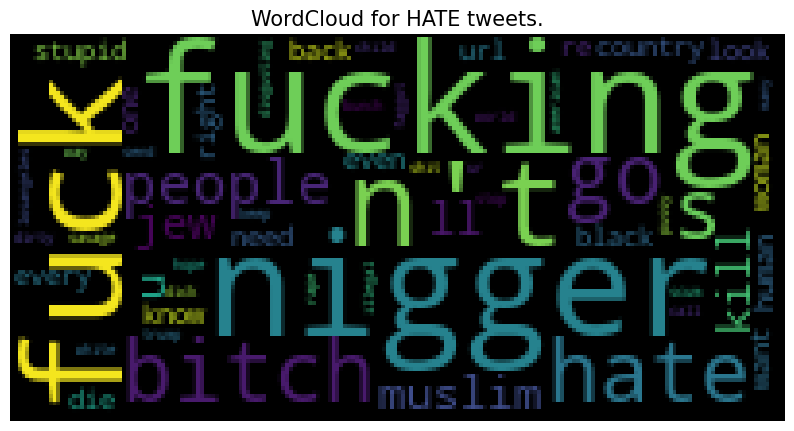

In [22]:
def plot_word_cloud(data, typ):
  tweet_corpus = " ".join(data['preprocessed_text'])

  plt.figure(figsize = (10,10))

  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(tweet_corpus)

  plt.title(f'WordCloud for {typ} tweets.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['hate_speech_score']>0.5], typ='HATE')

In [23]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((82159, 73), (20540, 73), (82159, 2), (20540, 2))

In [24]:
print(np.max(X_train))
print(np.max(X_val))

X_train = np.clip(X_train, 0, 36503)
X_val = np.clip(X_val, 0, 36503)

36484
36504


In [25]:
print(np.max(X_train))
print(np.max(X_val))

36484
36503


In [26]:
embedding_dim = 512

## Model Development

In [27]:
from keras.callbacks import EarlyStopping

model = keras.models.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=embedding_dim, input_length = max_len , trainable = True),
    layers.Bidirectional(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(2, activation='softmax')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 73, 512)           18690048  
                                                                 
 bidirectional (Bidirection  (None, 256)               656384    
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 19479042 (74.31 MB)
Trainable params: 19479042 (74.31 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [28]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=1,
                    verbose=1,
                    batch_size=32
                    )

2568/2568 [==============================] - 2766s 1s/step - loss: 0.1798 - accuracy: 0.9260 - val_loss: 0.1209 - val_accuracy: 0.9531


## Model Evaluation

In [30]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

642/642 [==============================] - 219s 341ms/step - loss: 0.1209 - accuracy: 0.9531
Validation Loss: 0.12089169770479202
Validation Accuracy: 0.9530671834945679


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

642/642 [==============================] - 214s 332ms/step


In [32]:
print(classification_report(y_val_true, y_val_pred_classes, target_names=['Not Hate', 'Hate']))

              precision    recall  f1-score   support

    Not Hate       0.96      0.95      0.95     10761
        Hate       0.95      0.96      0.95      9779

    accuracy                           0.95     20540
   macro avg       0.95      0.95      0.95     20540
weighted avg       0.95      0.95      0.95     20540



In [33]:
conf_matrix = confusion_matrix(y_val_true, y_val_pred_classes)
print(conf_matrix)

[[10227   534]
 [  430  9349]]


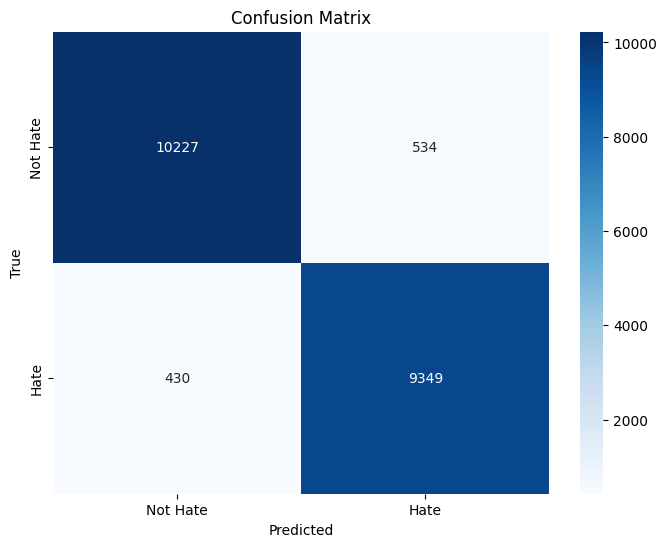

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hate', 'Hate'], yticklabels=['Not Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

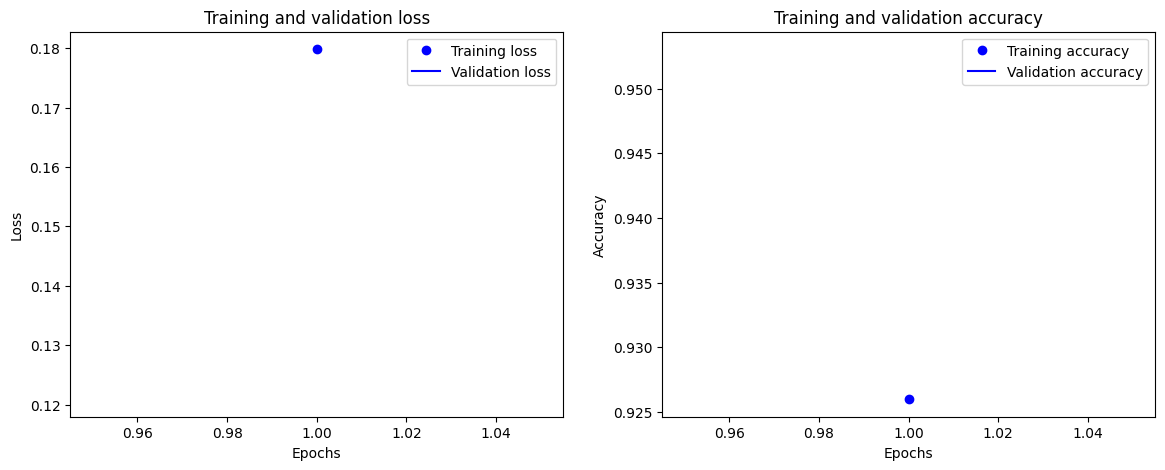

In [35]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
import joblib
joblib.dump((tokenizer, model), 'lstm_model.pkl')
print('The model is saved to model.pkl')

The model is saved to model.pkl


In [1]:
import joblib 
tokenizer, model = joblib.load("lstm_model.pkl")

In [5]:
from nltk.tokenize import word_tokenize

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    vocab = set()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]
    vocab.update(tokens)
    preprocessed_text = ' '.join(tokens)
    X = tokenizer.texts_to_sequences(preprocessed_text)
    max_len = max(len(y) for y in X)
    X = pad_sequences(X, maxlen=max_len)
    return X

In [21]:
pred = model.predict(preprocess("i am an expert of science"))

1/1 [==============================] - 0s 33ms/step


In [22]:
average_probabilities = np.mean(pred, axis=0)
print("Average Probabilities:", average_probabilities)

final_class = np.argmax(average_probabilities)
print("Final Class:", final_class)

if final_class == 0:
    print("The string is classified as hate speech.")
else:
    print("The string is classified as normal speech.")

Average Probabilities: [0.5213091 0.4786909]
Final Class: 0
The string is classified as hate speech.
